# Establishing A Toolkit

In this notebook we will be going over my process of setting up Tensorflow/Keras, and learning how to use both.

## Is Keras TensorFlow?

The short answer is as of TensorFlow 2.0, yes. 

Tensorflow is a large package that is made up of many different pieces all aimed at machine learning. Importantly TensorFlow provides the computational backend required for building, training, and working with ML constructs such as deep neural networks. It is extremely popular among professionals, and is regarded as one of the go to platforms for deep learning. 

Keras, on the other hand, is a high level neural network API. Keras is meant to (read is required to) interact with some sort of functional backend. For a long time, one such backend was TensorFlow. After installing both packages, a user could use the Keras API to more seamlessly interface with the TensorFlow computational side of things. Keras could also use other backends depending on the user preference, but TensorFlow was by far the most popular.

However, due to both platforms growing user base (which occured in tandem), things have changed with TensorFlow 2.0. Keras is now the official API of TensorFlow and is packaged within the TensorFlow product. Furthermore, Keras will no longer support other backends, and it will no longer provide major updates to its independent package.

What this means for me is that all I need to do is install TensorFlow and I am good to go.

Sources:
- [pyimageresearch blog post](https://www.pyimagesearch.com/2019/10/21/keras-vs-tf-keras-whats-the-difference-in-tensorflow-2-0/)
- [medium blog post](https://medium.com/implodinggradients/tensorflow-or-keras-which-one-should-i-learn-5dd7fa3f9ca0)
- [TensorFlow Documentation](https://www.tensorflow.org/guide/keras/sequential_model)

## Installing TensorFlow

The installation process here seems straightforward, but as is the usual case with things like this there is some conflicting information. Specifically, I am running Pop!\_OS (an Ubuntu derivative) that has its own documentation and pipeline for installing and managing TensorFlow. This installation method is different than the one TensorFlow itself suggests, using Pip. It is hard to tell if the Pop method is still valid, or prefferable, as it never mentions the existence of the Pip method -- a common problem with things like this.

I opted for the TensorFLow official Pip route since that seemed like the most established. I built a new Conda virtual environment and installed the package -- everything seemed to go smoothly. Next step try it out and see if it worked...

In [1]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.3.0


Wooooo!

## Intro To TensorFlow and Keras

Alright! Everything seems to be working, so lets try to dive into the actual software. My process will be to read through some of the documentation to get a good overview, and then try out some of the beginner TensorFlow tutorials.

- [TensorFlow Guide](https://www.tensorflow.org/guide)
- [Keras Documentation](https://keras.io/api/)

There are a LOT of components to TensorFlow, and a lot of changes in TensorFlow 2.0. I am sure one could spend years mastering and understanding all of it, so I will focus on a few standout items. This includes the basic Keras process, custom layers, and TensorFlow basics.

As discussed earlier, the Keras interface is now native to TensorFlow. One of the biggest aspects of Keras is the sequential model. This structure allows one to build what most would think of as a traditional network. An input feeds from one layer to the next (in a sequential manner) with an eventual output. Keras has its own layer naming system and the sequential model allows one to build any combination of these layers. For example, a model might be three convolution layers followed by three dense layers. Of course it can get much more complicated than that, but the idea of stacking selected layers on eachother stays the same. This sequential model is great for many uses, but it does not work with residual connections or multiple inputs/outputs anywhere in the network. An example of this structure adapted from [here](https://www.tensorflow.org/guide/keras/sequential_model) can be see below.

In [6]:
from tensorflow.keras import layers

model = keras.Sequential(
        [
            layers.Dense(2, activation='relu'),
            layers.Dense(4, activation='sigmoid')
        ])

There are also many other ways to interact with a sequential model and build a network. Note in the above example we have specified the output dimensionality (2 and 4) and the activation function. The input dimensionality is determined the first time an input is passed to the model. Consequently, this means that the weights aren't created until this first time an input is seen. It is possible to specify the input beforehand by using an input "layer" that specifies the input dimensionality to the following layer.

In [7]:
x = tf.ones((3,3))

print(model.layers[0].weights)
y = model(x)
print(model.layers[0].weights)

[]
[<tf.Variable 'dense_2/kernel:0' shape=(3, 2) dtype=float32, numpy=
array([[-0.6108996 , -0.12495816],
       [ 0.96206737, -0.1004166 ],
       [ 0.2859981 , -0.8152791 ]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]


We see that initially the call to the weights data returns an empty list, but after the model has seen some data the weights are populated. The output $y$ from the initial data can be seen below.

In [8]:
print(y)

tf.Tensor(
[[0.6364916  0.3459779  0.40121093 0.52103025]
 [0.6364916  0.3459779  0.40121093 0.52103025]
 [0.6364916  0.3459779  0.40121093 0.52103025]], shape=(3, 4), dtype=float32)


It doesn't really have any meaning because we haven't built our network with any purpose in mind, nor have we trained it on any data, but it serves as an example. We can now use a call to the summary function to view our network globally.

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (3, 2)                    8         
_________________________________________________________________
dense_3 (Dense)              (3, 4)                    12        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


The Keras API isn't only limited to a sequential model, and it can be used to build other network structures. This will be skipped in my introduction, but it is important to note. One important feature of Keras and TensorFLow is the ability to create custom layers. All one needs to do is build a subclass of the Keras layer. Included in this class are the layer "state" (trainable weights) and a "call" function. This "call" function is what executes the users desired custom functionality -- taking an input and producing some kind of output. The tools available for custom layers extend much further than this and provide a powerful way to develop novel networks.

TensorFlow itself provides a host of tools and capabilities including a vast mathematical system, eager execution, and graphs.

The mathematical toolkit provides a range of abilities, many of which are reminiscent of numpy or other mathematics packages. Tensors are very important in deep neural networks and are excellently supported within TensorFlow. Mathematical operations between tensors is also supported and used throughout the other mechanics of the software. Automatic differentation, which is neccessary for backpropogation, is also well implemented and provides a powerful and convenient tool for computing gradients. 

Eager exectuion is provided by TensorFlow for straightforward usage of the software in most basic settings. Essentially, this runs all operations sequentially like you would expect from a Python program. The alternative to this is a computational graph which will store the idea of a program you have written inside a speacialized graph data structure to be run later. This can provide significant speed advantages over the eager execution environment, but is harder for debugging and experimentation.

## Basic Image Classification

Here we will follow the [basic image classification](https://www.tensorflow.org/tutorials/keras/classification#explore_the_data) tutorial. This uses the MNIST Fashion dataset to build a dense neural network to identify images.

In [2]:
#Already did some of this, but just to be concise

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [34]:
#Get dataset. Pre-divided into test and train
mnist_data = keras.datasets.fashion_mnist
(train_imgs, train_labels), (test_imgs, test_labels) = mnist_data.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [35]:
print(train_imgs.shape)
print(test_imgs.shape)

(60000, 28, 28)
(10000, 28, 28)


We have downloaded our dataset and we can see the data is made up of 28x28 images. We have 60,000 training images and 10,000 test images. Each image is one of nine objects defined above in the class_names list.

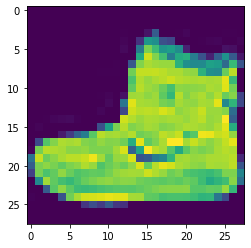

In [36]:
plt.imshow(train_imgs[0]);

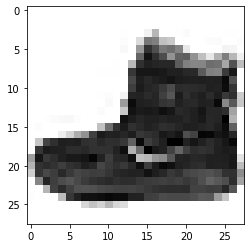

In [37]:
#Preprocessing
train_imgs = train_imgs/255.0
test_imgs = test_imgs/255.0

plt.imshow(train_imgs[0], cmap=plt.cm.binary);

In [38]:
#Building the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

Our model takes the input and flattens it to turn the image array into a vector. It is then processed through two dense layers with the output being an image label between 0 and 9.

In [39]:
model.compile(optimizer = 'Nadam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

We are using the Nadam gradient descent optimization algorithm. This was chosen for no particular reason, but just to get a sense of the choices in TensorFlow. 

Next we train our model on the training data for 10 epochs (total iterations).

In [40]:
#Training
model.fit(train_imgs, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4839 - accuracy: 0.8316
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3624 - accuracy: 0.8687
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3264 - accuracy: 0.8803
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3036 - accuracy: 0.8881
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2877 - accuracy: 0.8946
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2747 - accuracy: 0.8977
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2613 - accuracy: 0.9026
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2519 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2433 - accuracy: 0.9094
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.231

We can see the output of each epoch in the form of the loss and the accuracy. We see that our loss is decreasing and our accuracy is increasing as expected.

In [41]:
#Evaluation/Prediction
test_loss, test_acc = model.evaluate(test_imgs, test_labels, verbose=2)

313/313 - 0s - loss: 0.3458 - accuracy: 0.8803


Its doing pretty good, an 88% accuracy isn't bad. Lets add a softmax activation at the end of our model to turn our output into probability.

In [42]:
predictor = keras.Sequential([
            model,
            keras.layers.Softmax()
])

In [49]:
prob = predictor.predict(test_imgs)
print(prob[10])
print(np.argmax(prob[10]))
print(class_names[np.argmax(prob[10])])

[5.95888196e-06 3.00615555e-09 1.12917805e-02 4.74544803e-09
 9.71639991e-01 3.79483422e-09 1.70622971e-02 4.26308455e-09
 1.83530724e-09 3.12344710e-08]
4
Coat


According to our predictor the tenth test image is a coat. Lets take a look and see; also for good measure lets make sure our output sums to one.

In [52]:
print(np.sum(prob[10]))
class_names[test_labels[10]]

1.0


'Coat'

Ahah! So our network has correctly identified the image (a coat), thats cool. Borrowing some code from the tutorial we will examine all ten class predictions.

In [54]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

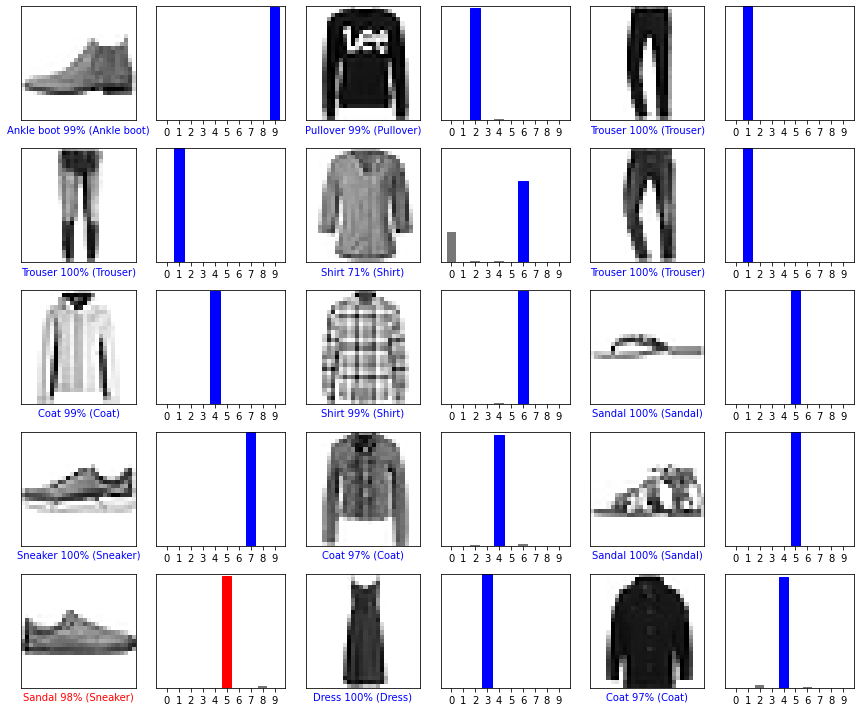

In [57]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, prob[i], test_labels, test_imgs)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, prob[i], test_labels)
plt.tight_layout()
plt.show()

For the most part our model does very well, but we see that it is very incorrect for the bottom left sneaker image which it classifies as a sandal. Heuristically, this makes sense as the shoe type images can be very similar.

Lastly, lets look at our final model summary.

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Conclusion

A resounding success if I say so myself. My goal with this report was to install and begin to learn TensorFlow. To that end I have a working installation of TensorFlow (pretty easy to do) which comes pre-packaged with Keras, and I have learned a great deal about the software. It is intuitive, powerful, and well documented. I feel much more confident moving forward to build more complex networks. Furthermore, the custom layer capabilities are very interesting and I hope to do some experimentation there. My next step in this area is to continue to learn more of the API, setup GPU support, and apply it to some broader and more interesting topics.